In [26]:
import sys
print(sys.executable)

c:\Users\Student\finance_week1\venv\Scripts\python.exe


QUANTITATIVE ANALYSIS

In [27]:
import talib
import os
import pandas as pd
print(talib.__version__)


0.6.3


This code snippet checks if a specified folder exists and displays its contents. It's useful for verifying data directories before processing files.

In [28]:
folder_path = '../yfinance_data/the file'  # or your full absolute path

if not os.path.exists(folder_path):
    print("❌ Folder not found:", folder_path)
else:
    print("✅ Folder found.")
    print("📄 Files:", os.listdir(folder_path))


✅ Folder found.
📄 Files: ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']


# CSV File Loader Documentation

## Overview
This script reads all CSV files from a specified directory, loads them into pandas DataFrames, and stores them in a dictionary with the ticker (filename without extension) as the key.


In [29]:
data_dict = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        ticker = filename.replace('.csv', '')
        data_dict[ticker] = df
        print(f"✅ Loaded: {ticker}")

✅ Loaded: AAPL_historical_data
✅ Loaded: AMZN_historical_data
✅ Loaded: GOOG_historical_data
✅ Loaded: META_historical_data
✅ Loaded: MSFT_historical_data
✅ Loaded: NVDA_historical_data
✅ Loaded: TSLA_historical_data


## Overview
This code snippet demonstrates loading and inspecting a single CSV file from a specified directory using pandas.

In [30]:
import pandas as pd

file_path = os.path.join(folder_path, os.listdir(folder_path)[0])
print("Loading file:", file_path)

df = pd.read_csv(file_path)
print("✅ First few rows:")
print(df.head())

Loading file: ../yfinance_data/the file\AAPL_historical_data.csv
✅ First few rows:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


This script loads multiple stock price CSV files from a directory into a dictionary of pandas DataFrames, performs basic data cleaning, and provides quick access to the loaded data.

In [31]:
# Path to the directory containing your CSV files
folder_path = "../yfinance_data/the file"  # e.g., "./stock_data"

# List to hold individual DataFrames
dataframes = {}

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        stock_name = filename.replace(".csv", "")
        file_path = os.path.join(folder_path, filename)
        
        # Load CSV into DataFrame
        df = pd.read_csv(file_path, parse_dates=True, index_col=0)
        
        # Keep only relevant columns
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
        df.dropna(inplace=True)
        
        # Save into dictionary with stock name as key
        dataframes[stock_name] = df

# Example: View tail of a specific stock (e.g., AAPL)
print(dataframes['AAPL_historical_data'].tail())

                  Open        High         Low       Close    Volume
Date                                                                
2024-07-24  224.000000  224.800003  217.130005  218.539993  61777600
2024-07-25  218.929993  220.850006  214.619995  217.490005  51391200
2024-07-26  218.699997  219.490005  216.009995  217.960007  41601300
2024-07-29  216.960007  219.300003  215.750000  218.240005  36311800
2024-07-30  219.190002  220.330002  216.119995  218.800003  41643800


# Enhanced Stock Data Processor with TA Indicators
This script loads stock price data from CSV files, calculates technical indicators using TA-Lib, and stores processed data in a dictionary for analysis. Each DataFrame includes OHLCV data plus several common technical indicators.

In [32]:
# Folder with your CSV files
folder_path = "../yfinance_data/the file"

# Dictionary to store stock data with indicators
data_dict = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, parse_dates=True, index_col=0)

        # Ensure the required columns exist
        if all(col in df.columns for col in ['Open', 'High', 'Low', 'Close', 'Volume']):
            # Add TA indicators
            df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
            df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
            
            macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
            df['MACD'] = macd
            df['MACD_Signal'] = macd_signal
            df['MACD_Hist'] = macd_hist

            # Drop NaNs generated by TA calculations
            df.dropna(inplace=True)

            # Save to dictionary
            ticker = filename.replace('.csv', '')
            data_dict[ticker] = df
            print(f"✅ Processed: {ticker}")
        else:
            print(f"❌ Missing required columns in: {filename}")


✅ Processed: AAPL_historical_data
✅ Processed: AMZN_historical_data
✅ Processed: GOOG_historical_data
✅ Processed: META_historical_data
✅ Processed: MSFT_historical_data
✅ Processed: NVDA_historical_data
✅ Processed: TSLA_historical_data


In [33]:
# View last rows of a stock with indicators
print(data_dict['AAPL_historical_data'].tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits      SMA_20     RSI_14  \
Date                                                                   
2024-07-24  61777600        0.0           0.0  224.228500  48.687742   
2024-07-25  51391200        0.0           0.0  224.440500  47.386437   
2024-07-26  41601300        0.0           0.0  224.633500  48.055700   
2024-07-29  36311800        0.0           0.0  225.014500  48.476184   
2024-07-30  41643800        0.0           0.0  22

# Technical Analysis Visualization

## Overview
This script generates a professional 3-panel technical analysis chart for each stock in the `data_dict`, showing:
1. Price with 20-period SMA
2. 14-period RSI with overbought/oversold levels
3. MACD with signal line and histogram

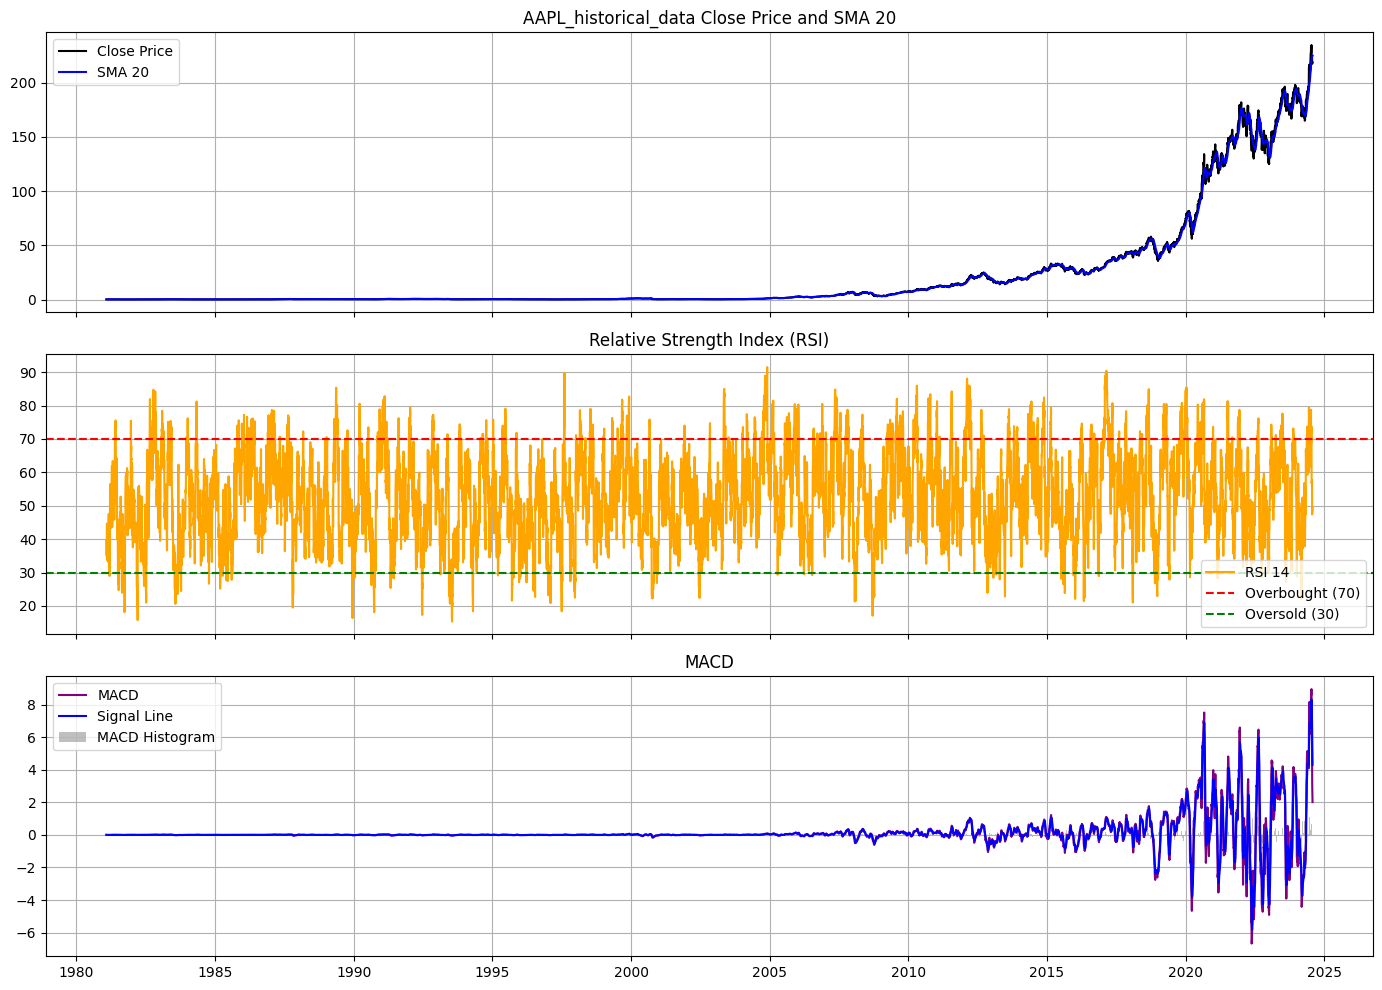

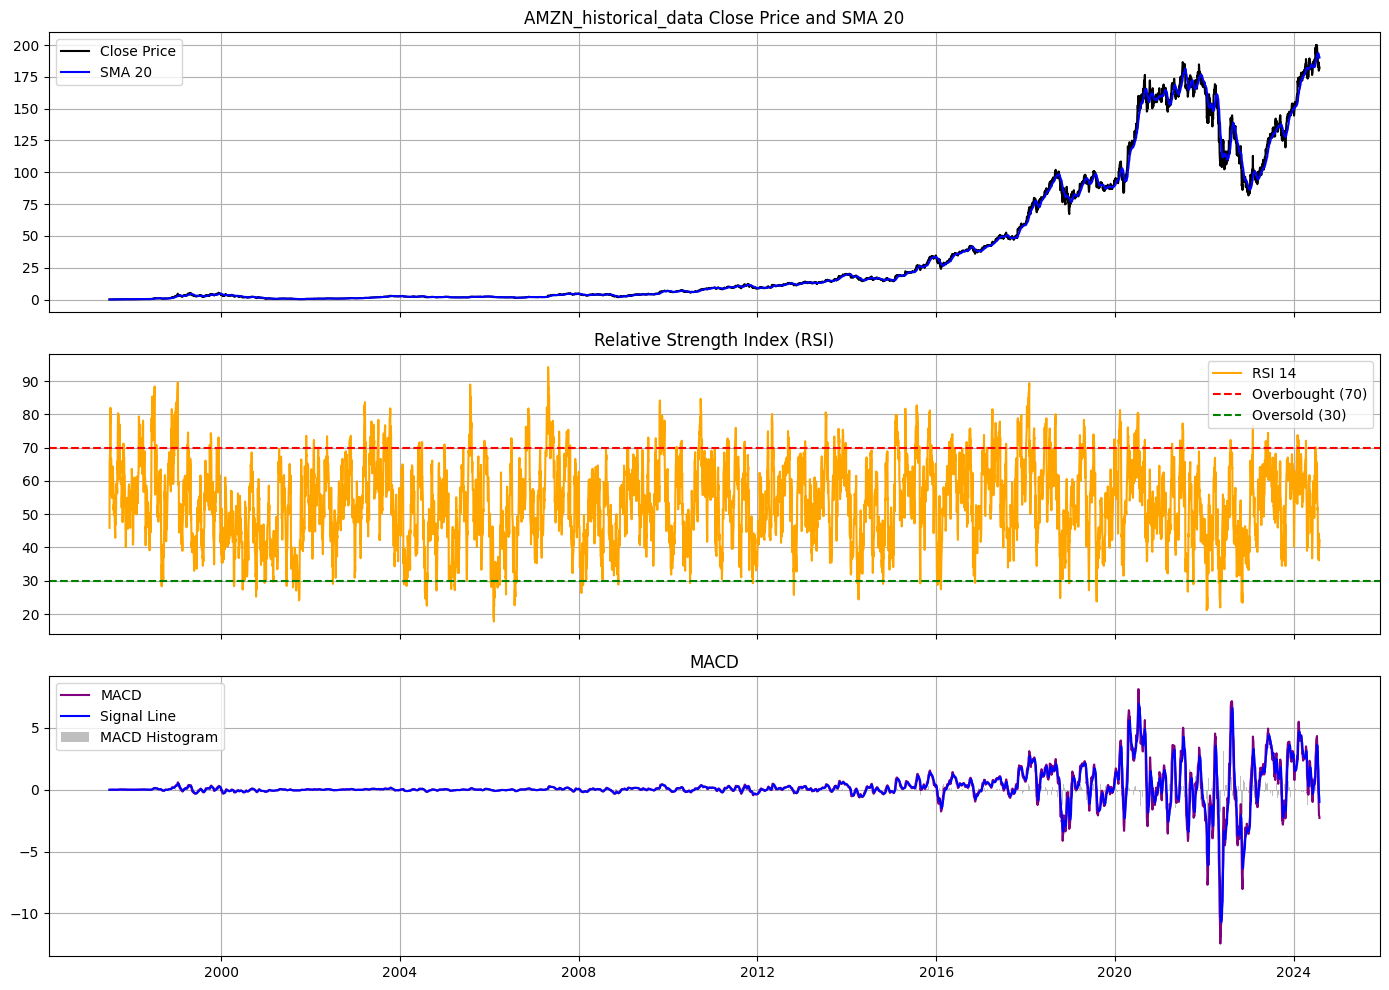

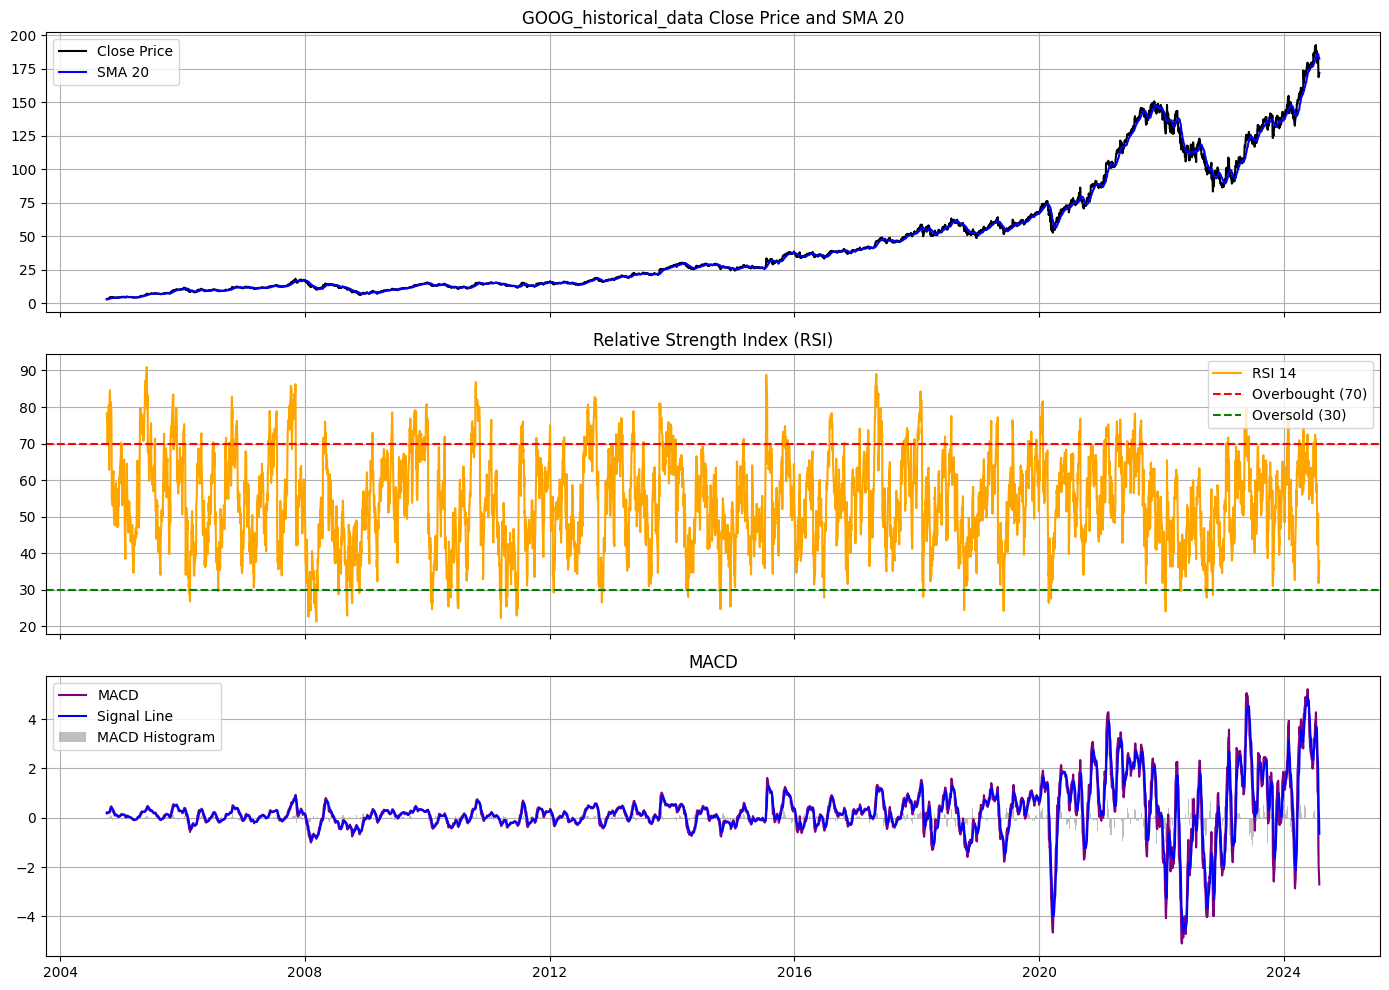

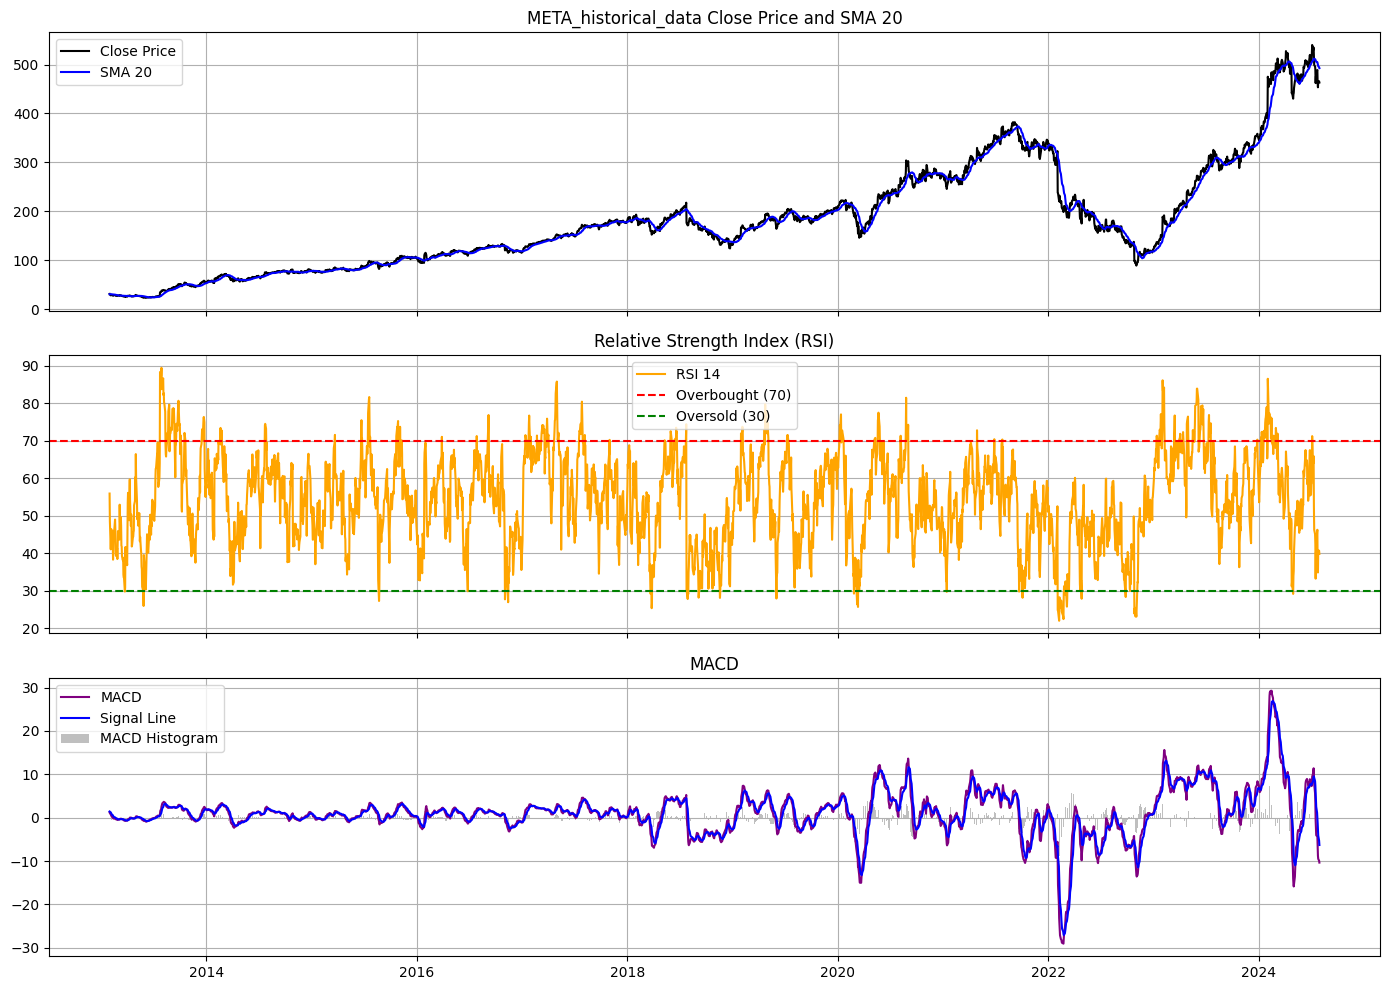

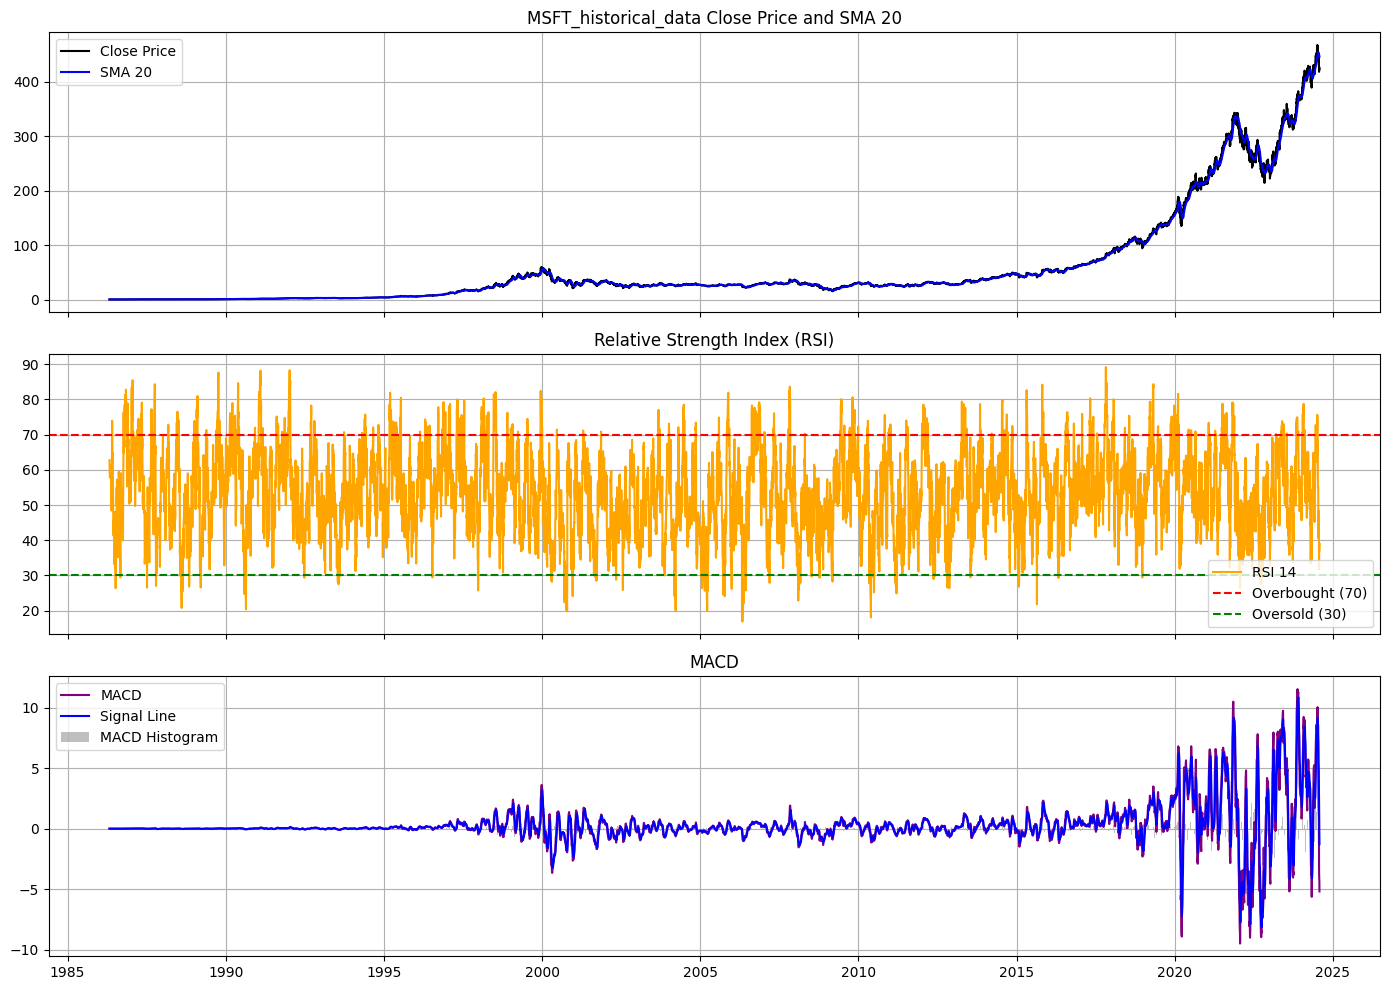

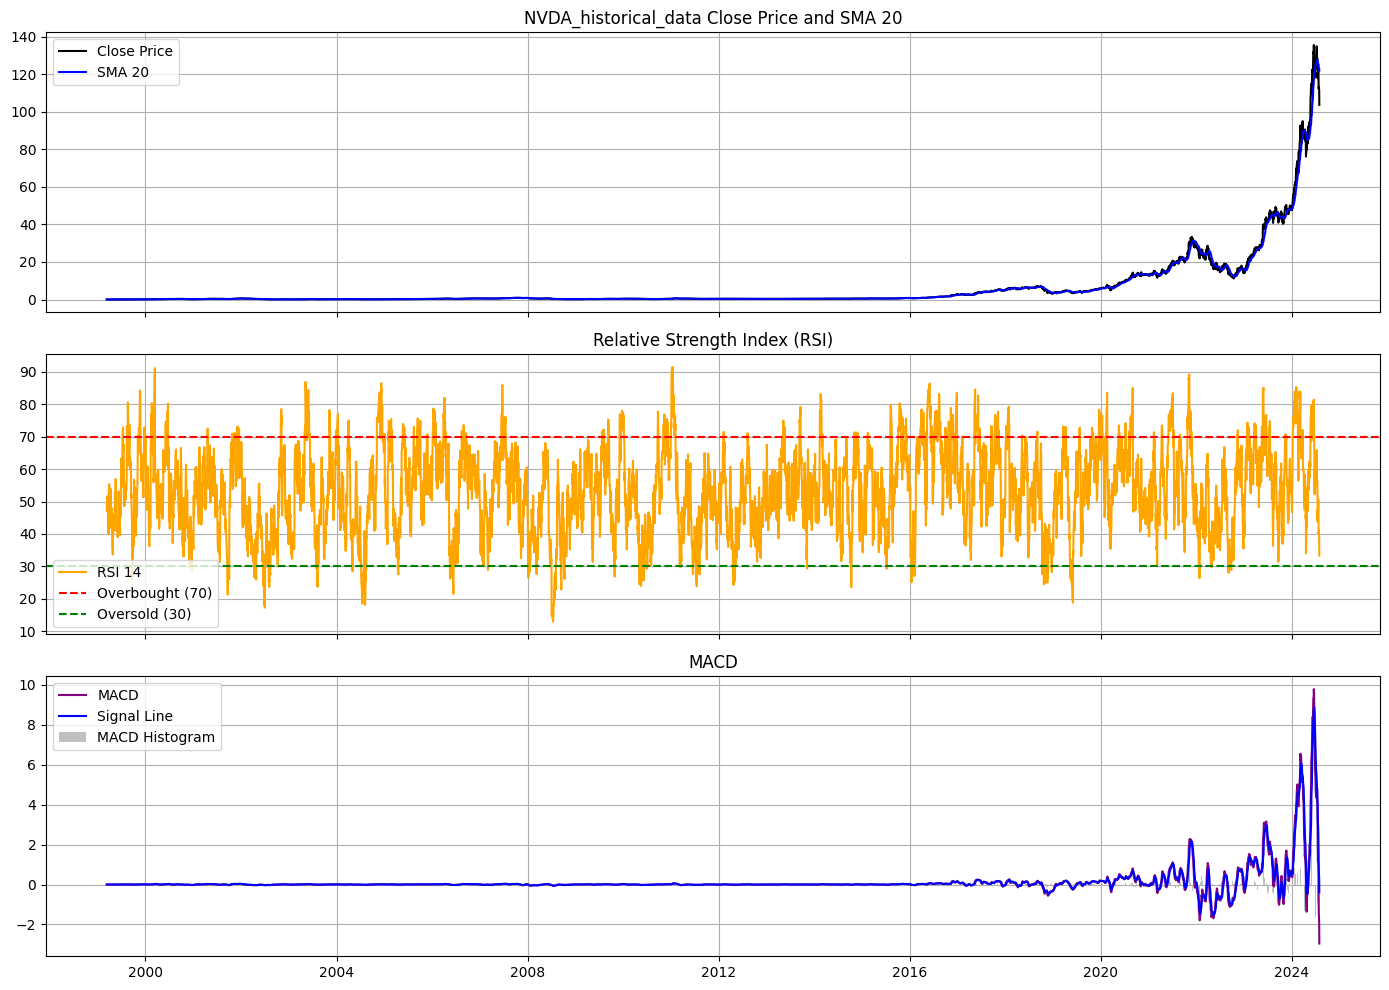

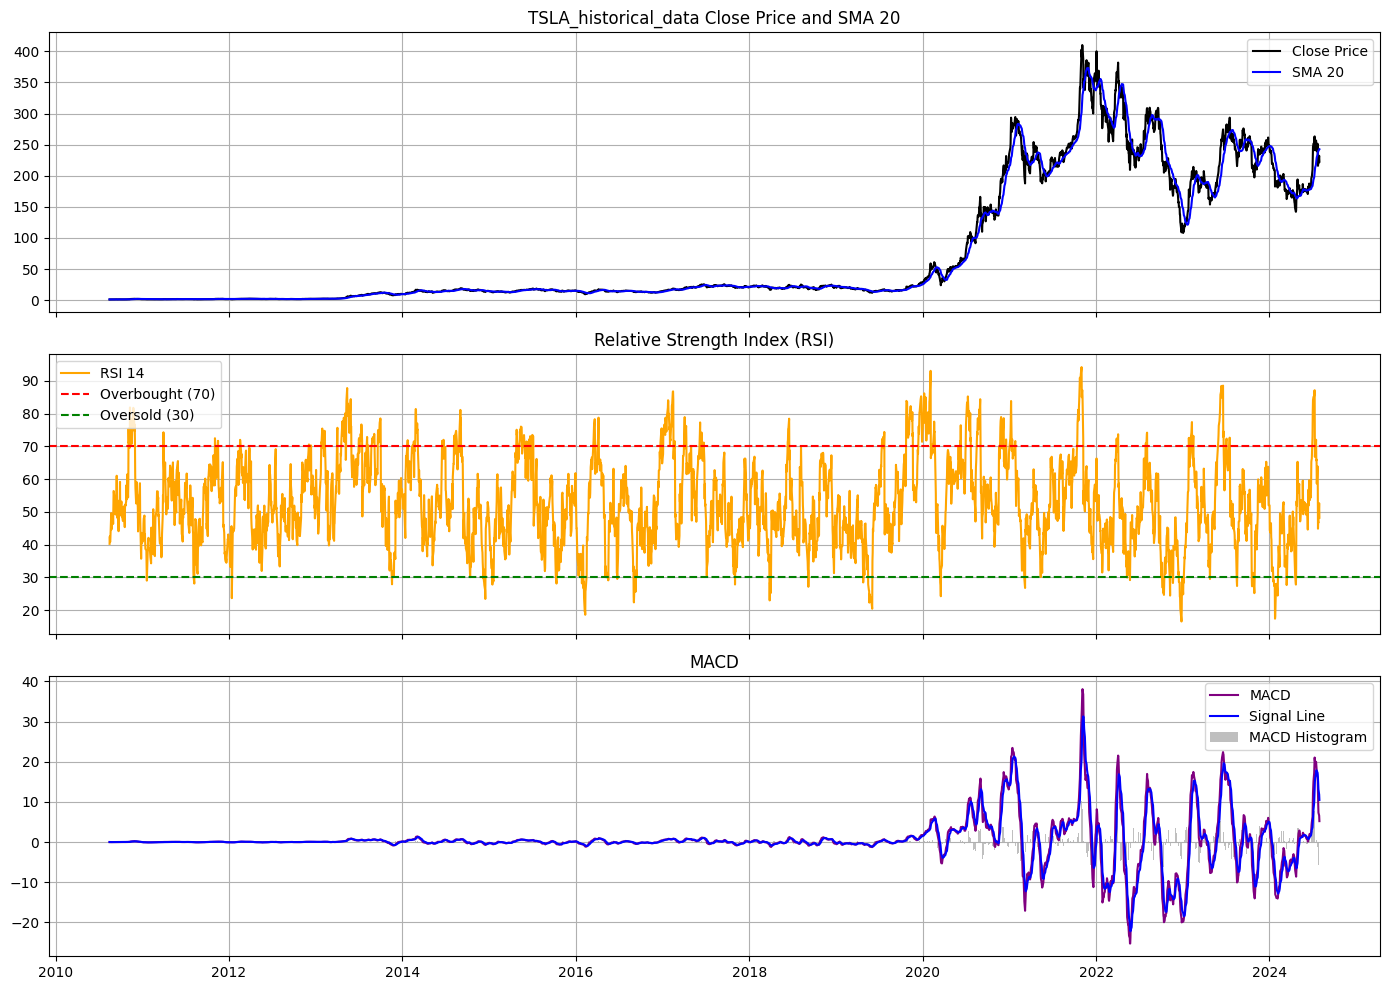

In [ ]:
import matplotlib.pyplot as plt

for ticker, df in data_dict.items():
    fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

    # Plot Close price and SMA20
    axs[0].plot(df.index, df['Close'], label='Close Price', color='black')
    axs[0].plot(df.index, df['SMA_20'], label='SMA 20', color='blue')
    axs[0].set_title(f'{ticker} Close Price and SMA 20')
    axs[0].legend()
    axs[0].grid(True)

    # Plot RSI
    axs[1].plot(df.index, df['RSI_14'], label='RSI 14', color='orange')
    axs[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axs[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    axs[1].set_title('Relative Strength Index (RSI)')
    axs[1].legend()
    axs[1].grid(True)

    # Plot MACD
    axs[2].plot(df.index, df['MACD'], label='MACD', color='purple')
    axs[2].plot(df.index, df['MACD_Signal'], label='Signal Line', color='blue')
    axs[2].bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
    axs[2].set_title('MACD')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

